Image and Poster Generator               

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]


Poster Design Prompt:
A white and green poster with a cheese design style for cheese. The title or theme is 'cheese'. The key text elements are: cheese. 


  0%|          | 0/50 [00:00<?, ?it/s]

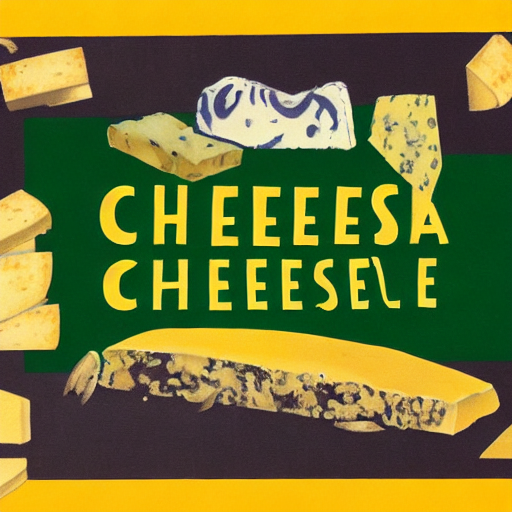

In [ ]:
# Imports
from PIL import Image
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import ipywidgets as widgets

# Load Stable Diffusion model and pipeline
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Function to generate the poster design
def generate_poster(title_theme, color_vibe, aim_objective, key_text, design_pref, additional_notes):
    # Formatting the prompt
    poster_prompt = f"A {color_vibe} poster with a {design_pref} design style for {aim_objective}. "
    poster_prompt += f"The title or theme is '{title_theme}'. "
    poster_prompt += f"The key text elements are: {', '.join(key_text.split(','))}. "
    poster_prompt += additional_notes

    print("\nPoster Design Prompt:")
    print(poster_prompt)

    # Generate image using Stable Diffusion
    with autocast("cuda"):
      output = pipe(poster_prompt, height=512, width=512)
      image = output["images"][0]  # Assuming "images" is the correct key
      image.save("poster_design_2.png")

    # Display the generated image
    display(image)

# Create input widgets
title_theme_input = widgets.Text(description="Title/Theme:")
color_vibe_input = widgets.Text(description="Color Scheme/Vibe:")
aim_objective_input = widgets.Text(description="Aim/Objective:")
key_text_input = widgets.Text(description="Key Text Elements:")
design_pref_input = widgets.Text(description="Design Preference:")
additional_notes_input = widgets.Textarea(description="Additional Notes:")

# Button to trigger the generation
generate_button = widgets.Button(description="Generate Poster")

# Function to handle button click event
def on_generate_button_clicked(b):
    generate_poster(title_theme_input.value, color_vibe_input.value, aim_objective_input.value, key_text_input.value, design_pref_input.value, additional_notes_input.value)

generate_button.on_click(on_generate_button_clicked)

# Arrange widgets in a layout
input_widgets = [title_theme_input, color_vibe_input, aim_objective_input, key_text_input, design_pref_input, additional_notes_input, generate_button]
input_box = widgets.VBox(input_widgets)

# Display the input widgets
display(input_box)
# Author: Vishnu Wala